In [1]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
def sigmoid(w,b,range=10):
    """
    
    """
        
    f = lambda x : 1/(1+np.exp(-x))
    x = np.linspace(-range,range)
    x = np.array([x,x]).T
    z = np.array( [ np.array(w).dot(i)+b for i in x])
    result = np.array([f(i) for i in z])
    return z,result

def error_0(x):
       return  -np.log(1-x)
    
def error_1(x):
      return -np.log(x)

# Optimization problem in L-regression,Gradient descent over cross-entropy function

Suppose we have a generic training set N: 
$$N={(x^{1},y^{1}),(x^{2},y^{2}),(x^{3},y^{3}),...,(x^{m},y^{m})}$$
made of m training examples where $ (x^{1},y^{1})$ is the first example and so on.More specificaly $x^{m}$ is the m-th imput variable of m ,while $y^{m}$ is its output,traget or label variable .Being this classification every output variable $y^{m}$
is bound between {0,1}. $y \in [0,1]$.
Each example $x^{n}$ is represented as usual by its feature vector
$$ \vec{x} =\quad  \begin{bmatrix}   x_0 \\ x_1 \\ ... \\ x_n\end{bmatrix}\quad  $$
where $x_0 = 1$ always .This generic example we don't know the exact  number of feature .Finaly we have a hypotesis function of logistic regresion ,matematicaly written as :
 $$h_{\theta}(\vec{x})= \frac{1}{1+e^{-\vec{\theta}.\vec{X}}}=\frac{1}{1+e^{-\theta^T.X}}$$
 $h_{\theta}(X)$ is also called sigmoid function ,graphicaly look like this :
 
 

Text(0.5, 1.0, 'SIgmoid')

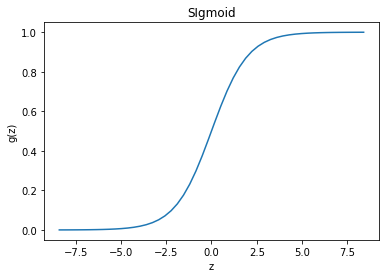

In [4]:
x,y = sigmoid([0.001,0.004],0.0008,range=1680)
plt.plot(x,y)
plt.xlabel('z')
plt.ylabel('g(z)')
plt.title('SIgmoid')

For now we just to notice that the most important properties the sigmoid function varies between $y\in [0,1]$  for every $x\in [- \infty,\infty]$ <br>
This mathematicaly propeties is verry can be expremy useful for clasification problem.
The main puprose of logistic regression is to chose the best parametes $\Theta s = \Theta_0,\Theta_1,..,\Theta_m $  acording to 
The cost fucntion for Logistic regression R-Suared measure is not capable for optimization  but the function  difined as :
$$   Cost(h_{\Theta}(x),y) = \Bigg( \begin{matrix}  -log(h_{\Theta}(x)) && if\; y=1 \\log( 1 - h_{\Theta}(x)) && if\; y=0\end{matrix}\Bigg)  $$ makes good job



D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


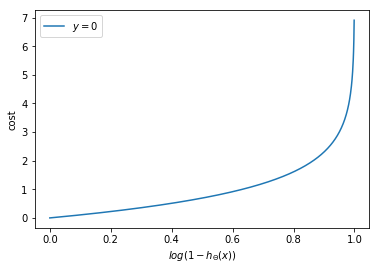

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


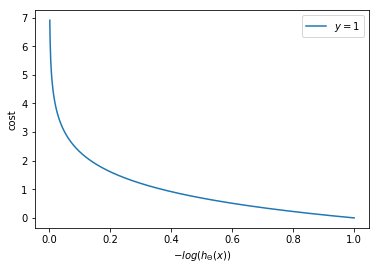

In [5]:
sigmoid_values = np.linspace(0, 1, 1000)
plt.plot(sigmoid_values, error_0(sigmoid_values), label = "$y=0$")
plt.xlabel(r'$log(1 - h_{\Theta}(x))$')
plt.ylabel('cost')
plt.legend()
plt.show()
plt.plot(sigmoid_values, error_1(sigmoid_values), label = "$y=1$")
plt.xlabel(r'$-log(h_{\Theta}(x))$')
plt.ylabel('cost')
plt.legend()
plt.show()

we have just seen is the  verbose version of cost function for logistic regression ,We can make it more compact into a one line
expression : this help us to avoiding boring if/else statement when converting this formula into an algorithm. : The expresion looks like this : <br> <br>
<h5>
    <font color='B233FF'>
    $$ Cost(h_{\Theta}(x),y) = -y.log(h_{\Theta}(x)) - (y-1)log(1 - h_{\Theta}(x))$$ 
   </font>   
    </h5>

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


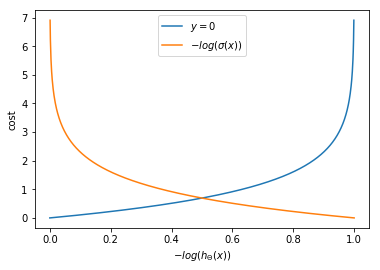

In [6]:
sigmoid_values = np.linspace(0, 1, 1000)
plt.plot(sigmoid_values, error_0(sigmoid_values), label = "$y=0$")
plt.xlabel(r'$log(1 - h_{\Theta}(x))$')
plt.ylabel('cost')
plt.legend()
plt.plot(sigmoid_values, error_1(sigmoid_values), label = "$-log(\sigma(x))$")
plt.xlabel(r'$-log(h_{\Theta}(x))$')
plt.ylabel('cost')
plt.legend()
plt.show()

#### The above graphics is called cross-etropy function ,which can be used as cost function for logistic regression

The logistic regression cost function for all input variable can be rewritten as :
<h5>
    <font color='B233FF'>
  $$ J(\Theta) = \sum_i^mCost(h_{\Theta}(x_i),y_i)=-\frac{1}{m}\big(\sum_i^my_i.log(h_{\Theta}(x_i)) + (y_i-1)log(1 - h_{\Theta}(x_i))\big)$$
  </font>
</h5>  
<h5>
    <font color='B233FF'>
 Let  try to understand why the minimization of an above function called cross-entropy will give the min error by using graphically representation below

   </font>
</h5>  

/home/daodeiv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/home/daodeiv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


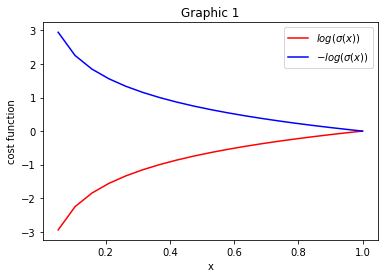

/home/daodeiv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/daodeiv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


Text(0.5, 1.0, 'Graphic 2')

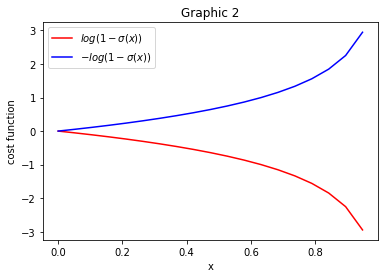

In [7]:
x = np.linspace(0,1,20)
y = np.log(x)
y1 = -np.log(x) 

plt.plot(x,y,color='red',label=r'$log(\sigma(x))$')
plt.plot(x,y1,color='blue',label=r'$-log(\sigma(x))$')
plt.xlabel("x")
plt.ylabel("cost function")
plt.title('Graphic 1')
plt.legend()
plt.show()

y = np.log(1-x)
y1 = -np.log(1-x) 

plt.plot(x,y,color='red',label=r'$log(1- \sigma(x))$')
plt.plot(x,y1,color='blue',label=r'$-log(1- \sigma(x))$')
plt.xlabel("x")
plt.ylabel("cost function")
plt.legend()
plt.title('Graphic 2')

<h5>
    <font color='B233FF'>
  How we can find the min entropy ? What does mean min entropy ?
  </font>
</h5>  
  
<h5>
  From  graphic 1 let notice that  if $$ (3) \; \; \; x \to 1 \; then \; -log(\sigma(x)) \to 1 $$ 
  $$ (4) \; \; \; x \to 1 \; then \; -log(\sigma(x)) \to 1 \;    $$ <br> <br>
    $$(5) \; \; \;x \to \infty \; then \; log(\sigma(x)) \to \infty $$
  $$ (6) \; \; \;x \to \infty \; then \;  -log(\sigma(x)) \to -\infty $$ </br>
</h5>  
from eq. (3) we can conclude that when we have to predict label with value = 1, then eq.(1) must be minimize and this give us the min error or min-entropy.other wise eq.(4) must to be maximize this will be our min error and min-entropy that comes from fact both functions is the opposite, but both functions is useless if we have to predict label value=0 because the function  −log(1−σ(x)),−log(1−σ(x))→+−∞  but this mean that the  error→+−∞  and entropy as well





<h5>
  From  graphic 1 let notice that  if $$ (7) \; \; \; x \to 1 \; then \; -log(1-\sigma(x)) \to \infty $$ 
  $$ (8) \; \; \; x \to 1 \; then \; -log(1-\sigma(x)) \to \infty;    $$ <br> <br>
    $$(9) \; \; \;x \to \infty \; then \; \;log(1-\sigma(x)) \to 0 $$
  $$ (10) \; \; \;x \to \infty \; then \; \; -log(1-\sigma(x)) \to 0 $$ </br>
</h5>  
from eq. (7)(8)(9)(10)  the minimization of error when Y(labeled)=0 can be used eq (3)

<h5>
   From above graphic   if $x \to 0 $ the $-log(\sigma(1-x)) \to 0 $ this mean and $x \to 1 $  the $ entropy \to \infty $.<\br>
     then we can use $-log(\sigma(1-x))$ to minimaize cost function whean label value is 0 with our $h_{\Theta}=\sigma(\Theta)$      then measure for min error or min entropy will be the -log(1-\sigma(x))
</h5>    


### Optimization problem

  $$ J(\Theta) = \sum_i^mCost(h_{\Theta}(x_i),y_i)=-\frac{1}{m}\big(\sum_i^my_i.log(h_{\Theta}(x_i)) + (1-y_i)log(1 - h_{\Theta}(x_i))\big)$$

<h3> let to find some derivates of function wich will be very useful </h3>

<br>
$$ 1 )\; \; \frac{\partial h_{\Theta(z)}}{\partial x_i } = \frac{d h_{\Theta(z)}}{dz}.\frac{\partial z}{\partial x_i}  $$



<br> <br>

$$ 2)\; \; \frac{d h_{\Theta(z)}}{dz} = \frac{\frac{1}{1+e^{-z}}}{dz}= \frac{e^{-z}}{(1+e^{-z})^2}=\frac{1}{1+e^{-z}}(1 -\frac{1}{1+e^{-z}} ) = h_{\Theta}(z)(1 - h_{\Theta}(z))  $$ <br> <br>



$$ 3) \; \ \frac{dlog(h_{\Theta}(x_i))}{dz} = \frac{1}{h_{\Theta}(z)}\frac{dh_{\Theta}(z))}{dz} =\frac{1}{h_{\Theta}(z)} h_{\Theta}(z)(1 - h_{\Theta}(z))=(1 - h_{\Theta}(z)) $$


<br> <br>
$$ 4) \frac{dlog(1 - h_{\Theta}(z))}{dz} = \frac{1}{(1- h_{\Theta}(z))}\frac{d(1-h_{\Theta}(z)))}{dz} = \frac{1}{(1- h_{\Theta}(z))}\frac{-d(h_{\Theta}(z)))}{dz}=-\frac{1}{(1-h_{\Theta}(z))} h_{\Theta}(z)(1 - h_{\Theta}(z))=- h_{\Theta}(z)) $$

Let to find partial derivate of function  $J(\Theta)$ respect a and b
<br>$$4) \; \; \dot{J}(\theta)_a=\frac{\partial J(\theta)}{\partial a} =  $$ <br>

<br>
$$ -\frac{1}{m}\sum_i^m\big(y_i \frac{\partial log(h_{\Theta}(z))}{\partial a}+  (1-y_i) \frac{\partial log(h_{\Theta}(z)-1)}{\partial a}\big) = $$ <br> <br>

$$-\frac{1}{m}\sum_i^m\big(y_i \frac{dlog(h_{\Theta}(z))}{dz}\frac{\partial z}{\partial a}+  (y_i-1) \frac{dlog(1- h_{\Theta}(z))}{dz}\frac{\partial z}{\partial a}\big) =  $$ <br>

When we apply the eqation 3) 4) we achieve
$$-\frac{1}{m}\sum_i^m\big(y_i (1 - h_{\Theta}(z))\frac{\partial z}{\partial a}+  (1-y_i) (- h_{\Theta}(z))\frac{\partial z}{\partial a})\big) =  $$ <br>
$$-\frac{1}{m}\sum_i^m\big(y_i\frac{\partial z}{\partial a} -y_ih_{\Theta}(z))\frac{\partial z}{\partial a} +y_ih_{\Theta}(z))\frac{\partial z}{\partial a} - h_{\Theta}(z)\frac{\partial z}{\partial a}) =   $$ <br>







$$1) \; \; -\frac{1}{m}\sum_i^m\big(y_i\frac{\partial z}{\partial a} - h_{\Theta}(z)\frac{\partial z}{\partial a}\big) $$
from $ \frac{\partial z}{\partial a}=\frac{\partial (ax +b)}{{\partial a}=x$


we achieve as final $$11)  \; \frac{\partial J(\theta)}{\partial a} = -\frac{1}{m}\sum_i^m\big((y_i - h_{\Theta}(z))x_i\big) $$


from $ \frac{\partial z}{\partial b}=\frac{\partial (ax +b)}{\partial b}=1 $

from  $$12) \; \frac{\partial J(\theta)}{\partial b} = -\frac{1}{m}\sum_i^m\big((y_i - h_{\Theta}(z))\big) $$









The next step is to implement gradient descent using 11) 12)

$$ 13) \; \; a = a  - \frac{\partial J(\theta)}{\partial a} $$ <br> <br>
$$ 14) \; \; a = a  + \frac{1}{m}\sum_i^m\big((y_i - h_\theta(a.x_i + b))x_i\big) $$ <br>
$$ 15) \; \; b = b  - \frac{\partial J(\theta)}{\partial b} $$ <br>
$$ 16) \; \; b = b  + \frac{1}{m}\sum_i^m\big((y_i -h_\theta(a.x_i + b))\big) $$ <br>
where $h_\theta(z) = \frac{1}{1+e^{a.x_i + b}}$

In [90]:
def perform_gradient_descent(x_data,y_data,times_interaction=100,learning_rate=0.1):
    a = 10
    b = 10
    a_args=[a]
    b_args=[b]
    for i in range(times_interaction):
        a = a + cost_a(a,b,x_data,y_data)*learning_rate
        b = b + cost_a(a,b,x_data,y_data)*learning_rate
        a_args=np.append(a_args, a)
        b_args=np.append(b_args, b)
   
    return a,b,a_args,b_args

-3